In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


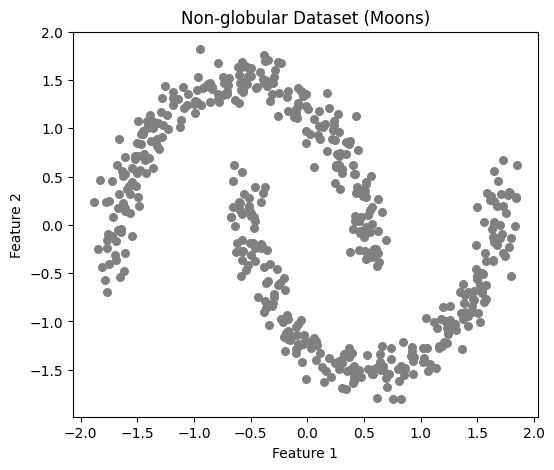

In [ ]:
# Generate non-globular (crescent-shaped) data
X, _ = make_moons(n_samples=500, noise=0.07, random_state=42)

# Scale features for better performance
X_scaled = StandardScaler().fit_transform(X)

plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], color='gray', s=30)
plt.title("Non-globular Dataset (Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

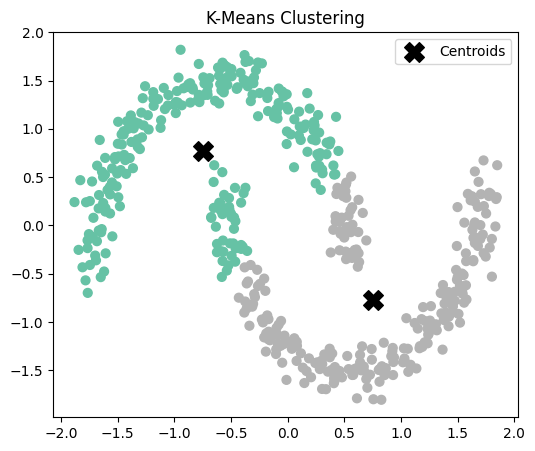

K-Means Silhouette Score: 0.494


In [ ]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans_labels, cmap='Set2', s=40)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='black', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

print(f"K-Means Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.3f}")


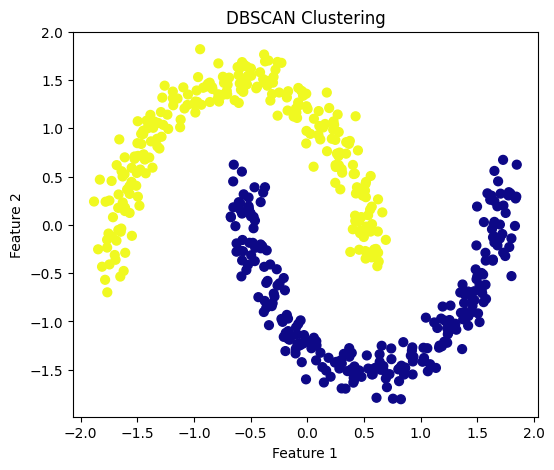

DBSCAN Silhouette Score (excluding noise): 0.386


In [ ]:
# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=dbscan_labels, cmap='plasma', s=40)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Filter out noise (-1) for silhouette score
mask = dbscan_labels != -1
if len(set(dbscan_labels[mask])) > 1:
    score = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    print(f"DBSCAN Silhouette Score (excluding noise): {score:.3f}")
else:
    print("DBSCAN produced only one cluster (silhouette undefined).")
